Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

<div class="alert alert-block alert-info">
<h3>Student(s) Information</h3> Please provide information about yourself.<br>
<b>Name1</b>: <br>
<b>Name2 (optional) </b>:<br>
<b>NetID 1</b>: <br>
<b>NetID 2 (optional)</b>:<br>
<b>Group Project Declaration</b> (please provide a brief description of your partners contribution to the project. Do not discuss with partner before writing this):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:      


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## Important
<font color='red'>
This project is provided to you as a class project in CS439. **DO NOT** post this notebook in any public or commerical space. Doing so may result in severe penalties. Please discuss with instructor if you have questions. 
</font>

# CS 439 - Introduction to Data Science
### Spring 2023

# Midsemester Project : Twitter Data Analysis

### Due Date : Sunday March 26th, 2023 by 11:59 PM 


### Completing this project
This is your mid-semester project. You can work on this project individually or as part of a group of 2.
    
#### 1. Working with a partner
Only one partner (max two per group) is allowed. Each person in the group is expected to contribute equally to the project. The team needs to do work equivalent to 2 individuals. We will be strict in grading criteria for groups. The team also needs to work hard to find good answers for Part 1 and Part 7. A post questionaire may be given to assess each person contribution. Each person in the team MUST submit a copy of the project. You MUST complete this survey by 3/10 to work as a team <a href="https://forms.gle/2qcog71UqQsgovCB8">CLICK HERE TO FILL THE SURVEY </a>

#### 2. Working by yourself
If you work by yourself, you have two parts optional. Part 1 and Part 7. You are welcome to try those Parts just to learn things. No extra credit.


## Project Purpose    
 
The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, Former President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. In fact, social media post are so influential, now the traditional media spends considerable amount of time discussing social media posts. Tweets from people like Donald Trump and Elon Musk have become so consequential, they can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump or Musk meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from former US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we can pick any person (Hillary Clinton or Donald Trump or Elon Musk) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret insights w/o any bias.

## Grading of the Project
You can test your project with the files provided. We may test the correctness of your code using **different files**. As a result, we will not provide sample outputs for this project. You will need to determine if the output received is reasonable. We are not looking for 100% compatibility with any one data set.

## Set up
Let us get all the libaries initialized as necessary

In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json
import os
import warnings
warnings.filterwarnings('ignore')


# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [3]:
import nltk
import nltk.corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/thn26/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/thn26/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/thn26/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Downloading Recent Tweets (group only)
It is important to download the most recent tweets (especially if you are working as a group). You cannot download the recent tweets by @realdonaldtrump as he was inactive for last two years. But you can download tweets from @elonmusk or @joebiden to see how things work. Those who are working by themselves are allowed to use the downloaded files in data folder w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

In [4]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
#!pip uninstall tweepy
!pip install tweepy
import tweepy

Defaulting to user installation because normal site-packages is not writeable


## PART 1:  Accessing Twitter API  (optional for individuals)
In order to access Twitter API, you need to get keys by signing up as a Twitter developer. We will walk you through this process. 
* if you are working by yourself on this project, you can skip PART 1, and complete the project using the data files provided in the data folder instead. We highly recommend that you do Part 1 as an individual (after completing the project with offline data). You will "learn" how to use Twitter API that might be useful for learning how to work with API's.

### Task 1.1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com/).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://developer.twitter.com/en) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at Rutgers University and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://developer.twitter.com/en/docs/projects/overview).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.

## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> It is possible that you can accidentally re-tweet some tweets because you typed `retweet` instead of `retweet_count`. 
</span>


### Reading Keys.json

In [5]:
import json
key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled in question 1):
with open(key_file) as f:
    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

### Task 1.2 Testing Twitter Authentication
This following code should run w/o errors or warnings and display Rutgers University's twitter username

In [6]:
import tweepy
from tweepy import TweepyException
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    redirect_url = auth.get_authorization_url()
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Rutgers username is:", api.get_user(screen_name="RutgersU").name)
except TweepyException as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

Rutgers username is: Rutgers University


In [7]:
# What is RutgersU screen name?
user = api.get_user(screen_name="RutgersU")
print("Rutgers username is:", user.name)
# What is the location RutgersU?
print("RutgersU location is:", user.location)
# What is a description for RutgersU?
print("RutgersU description is:", user.description)
# How many follow RutgersU?
print("RutgersU has", user.followers_count, "followers.")
# When was RutgersU account created?
print("RutgersU account was created on", user.created_at.strftime('%Y-%m-%d'))
# Is RutgersU a verified account?
print("RutgersU is a verified account:", user.verified)


Rutgers username is: Rutgers University
RutgersU location is: New Jersey
RutgersU description is: Rutgers, The State University of New Jersey, is a leading public research university. Follow us for all things Rutgers.
RutgersU has 141759 followers.
RutgersU account was created on 2009-01-21
RutgersU is a verified account: True


### Task 1.3

### Refactor and Extend Code

Re-factor the above twitter authentication code and extend the code into reusable snippets below.  

In [8]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    ### BEGIN ANSWER
   
    # your solution here
    with open(path, "r") as f:
        keys = json.load(f)
    return keys
    ### END ANSWER

In [9]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    import tweepy
    
   ### BEGIN ANSWER
   
    # your solution here
    # Authenticate with Twitter
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth, wait_on_rate_limit=True)
    
    # Download recent tweets by the user
    tweets = []
    for status in tweepy.Cursor(api.user_timeline, screen_name=user_account_name, tweet_mode="extended").items():
        tweets.append(status._json)
        
    return tweets

    ### END ANSWER

In [10]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    ### BEGIN ANSWER
   
    # your solution here
    with open(path, "r", encoding="utf-8") as f:
        tweets = json.load(f)
    
    return tweets

    ### END ANSWER

In [11]:
import pickle
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    ### BEGIN ANSWER
   
    # your solution here
    import os
    
    cache_file_name = f"{user_account_name}_recent_tweets.pkl"
    cache_path = os.path.join('.', cache_file_name)
    if os.path.exists(cache_path):
        print(f"Loading {user_account_name} recent tweets from cache...")
        tweets = load_tweets(cache_path)
    else:
        print(f"Downloading {user_account_name} recent tweets...")
        keys = load_keys(keys_path)
        tweets = download_recent_tweets_by_user(user_account_name, keys)
        save_tweets(tweets, cache_path)
    return tweets

    ### END ANSWER

### Task 1.4
If everything was implemented correctly you should be able to obtain roughly the last max number of tweets by @RutgersU. (This may take a few minutes)

In [12]:
key_file = "keys.json"
keys = load_keys(key_file)
# When you are done, run this cell to load latest @RutgersU 's tweets. This is to get the latest tweets. Do not use the cached file
rutgers_tweets = download_recent_tweets_by_user("RutgersU", keys)
print("Number of tweets downloaded:", len(rutgers_tweets))

Number of tweets downloaded: 3248


## PART 2 - Working with Twitter Data (group/individual)
The json file in data folder contains some loaded tweets from @RutgersU and @realdonaldtrump. Run the folllowing code and read and understand and what it does. Groups must download the latest tweets from @RutgersU using tweepy (and call that). Individuals can use the given file.

In [13]:
from pathlib import Path
import json

ds_tweets_save_path = "data/RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [14]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   

In [15]:
# print the first 50 tweets from the cached file
for i in range(50):
    print("tweet {} --{}\n".format(i+1,example_tweets[i]['full_text']))

tweet 1 --RT @RutgersNB: As the #internet turns 50, @RutgersCommInfo's @MaryChayko focuses on how we have used the innovation and what it has meant f…

tweet 2 --RT @RutgersNB: According to U.S. Rep. @FrankPallone, "continuous pharmaceutical manufacturing is the future of medicine." Now, new legislat…

tweet 3 --RT @RutgersLaw: The 34th Annual Mary Philbrook Public Interest Award Celebration honored Lloyd Freeman RLAW'07 (@Esquire1911), Partner and…

tweet 4 --RT @prccrutgers: We will be holding our 4th Annual MLK Oratorical Competition in January 2020. You must write &amp; recite an original speech c…

tweet 5 --Happy first day of November! Can you believe we are already more than halfway through the semester? 🍂

📷: @curtiswebsterr on Instagram https://t.co/8tOBOjvVzl

tweet 6 --RT @RUFedRelations: @EnergyCommerce @FrankPallone @ContinuousMFG @RutgersU To learn more about @FrankPallone's new pharmaceutical manufactu…

tweet 7 --Daniel Hayden went back to school to pursue a physics deg

### Task 2.2
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the data folder. One of the files is 'TrumpTweets_1.json', the other one is 'TrumpTweets_2.json'. First load TrumpTweets_1.

In [16]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets will be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [17]:
dest_path = 'data/TrumpTweets_1.json'
trump_tweets = load_tweets(dest_path)

In [18]:
# print the first 10 Trump tweets
for i in range(10):
    print("tweet {} -- {}\n".format(i+1,trump_tweets[i]['text']))

tweet 1 -- Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!

tweet 2 -- Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR CHANGE!

tweet 3 -- The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. No more!

tweet 4 -- HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!

tweet 5 -- As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Med

In [19]:
##loding TrumpTweets_2.json
import pandas as pd
dest_path = 'data/TrumpTweets_2.json'
trump_tweets2 = load_tweets(dest_path)
trump_tweets2 = pd.DataFrame(trump_tweets2)
trump_tweets2.head()

created_at                   id               id_str  \
0  Tue Oct 16 16:22:11 +0000 2018  1052233253040640001  1052233253040640001   
1  Tue Oct 16 16:18:08 +0000 2018  1052232230972678145  1052232230972678145   
2  Tue Oct 16 15:26:33 +0000 2018  1052219253384994816  1052219253384994816   
3  Tue Oct 16 15:18:51 +0000 2018  1052217314463100928  1052217314463100928   
4  Tue Oct 16 15:04:32 +0000 2018  1052213711295930368  1052213711295930368   

                                                                                                                                                                                                                                                                                 full_text  \
0                                                                                                                                                                                                                     REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU   
1                                                                                                                                                                                                                                                  RT @WhiteHouse: https://t.co/RNqLpOtS3O   
2                 Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????   
3  “Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?   
4  “Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...   

   truncated display_text_range  \
0      False            [0, 44]   
1      False            [0, 39]   
2      False           [0, 264]   
3      False           [0, 279]   
4      False           [0, 280]   

                                                                                                                                                                                                                                                                                  entities  \
0  {'hashtags': [{'text': 'MAGA', 'indices': [37, 42]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0pWiwCHGbh', 'expanded_url': 'http://Vote.GOP', 'display_url': 'Vote.GOP', 'indices': [12, 35]}, {'url': 'https://t.co/ACTMe53TZU', 'expanded_url': 'https:...   
1  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'WhiteHouse', 'name': 'The White House', 'id': 822215673812119553, 'id_str': '822215673812119553', 'indices': [3, 14]}], 'urls': [], 'media': [{'id': 1052215563894763522, 'id_str': '1052215563894763522', 'indic...   
2                                                                                                                                                                                                                         {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}   
3                                                                                                                                                                                                                         {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}   
4                                                                                                                {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FoxNews', 

### Task 2.3

Find the number of the month of the oldest tweet.

In [20]:
# Find the number of the month of the oldest tweet (e.g. 1 for January)
trump_tweets = pd.DataFrame(trump_tweets)

### BEGIN ANSWER
def oldest_tweet(df):
    
    df['created_at'] = pd.to_datetime(df['created_at'])
    old_entry = df[df['created_at'] == df['created_at'].min()]['created_at'].dt.month.values
    return old_entry
### END ANSWER

oldest_month = oldest_tweet(trump_tweets)
print(oldest_month[0])

1


## PART 3  Twitter Source Analysis (group/individual)



### Task 3.1

Merge the two dataframes created from TrumpTweets_1 and TrumpTweets_2. Call this new dataframe all_tweets

In [21]:
all_tweets = pd.concat([trump_tweets,trump_tweets2])
all_tweets.head()

source                  id  \
0  Twitter for iPhone  947824196909961216   
1  Twitter for iPhone  947810806430826496   
2  Twitter for iPhone  947802588174577664   
3  Twitter for iPhone  947614110082043904   
4  Twitter for iPhone  947592785519173637   

                                                                                                                                                                                                                                                                                      text  \
0                                                                                                                                                                  Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!   
1  Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR ...   
2  The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. ...   
3                                                                                                                                                                                         HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!   
4                                                      As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!   

                  created_at  retweet_count in_reply_to_user_id_str  \
0  2018-01-01 13:37:52+00:00           8237                    None   
1  2018-01-01 12:44:40+00:00          14595                25073877   
2  2018-01-01 12:12:00+00:00          49566                    None   
3  2017-12-31 23:43:04+00:00          35164                    None   
4  2017-12-31 22:18:20+00:00          39428                    None   

   favorite_count is_retweet id_str full_text  ... quoted_status_id  \
0           51473      False    NaN       NaN  ...              NaN   
1           53557      False    NaN       NaN  ...              NaN   
2          138808      False    NaN       NaN  ...              NaN   
3          154769      False    NaN       NaN  ...              NaN   
4          157655      False    NaN       NaN  ...              NaN   

  quoted_status_id_str quoted_status_permalink  quoted_status favorited  \
0                  NaN                     NaN            NaN       NaN   
1                  NaN                     NaN            NaN       NaN   
2                  NaN                     NaN            NaN       NaN   
3                  NaN                     NaN            NaN       NaN   
4                  NaN                     NaN            NaN       NaN   

   retweeted possibly_sensitive lang extended_entities retweeted_status  
0        NaN                NaN  NaN               NaN              NaN  
1        NaN                NaN  NaN               NaN              NaN  
2        NaN                NaN  NaN               NaN              NaN  
3        NaN                NaN  NaN               NaN              NaN  
4        NaN                NaN  NaN               NaN              NaN  

[5 rows x 33 columns]

### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. 
**Important:** There may/will be some overlap so be sure to __eliminate duplicate tweets__. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. **Hint:** the `id` of a tweet is always unique.

The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet.
- `favorite_count`: The favorite count of the tweet.

Finally, **the resulting dataframe should be sorted by date/time.**

**Warning:** *Some tweets may store the text in the `text` field and other will use the `full_text` field.*

In [22]:
all_tweets['id'] = all_tweets['id'].astype(int)
all_tweets['time'] = pd.to_datetime(all_tweets['created_at'],utc = True)
all_tweets['text']=all_tweets['text'].mask(all_tweets['text'].isna(), all_tweets['full_text'])
df_trump = all_tweets[['time','source','id','text','retweet_count','favorite_count']]
df_trump = df_trump.drop_duplicates(subset='id', keep='last')
df_trump = df_trump.set_index('id')
df_trump = df_trump.sort_values('time')

In [23]:
df_trump.head()

time               source  \
id                                                                  
682723973449289728 2016-01-01 00:44:14+00:00  Twitter for Android   
682764544402440192 2016-01-01 03:25:27+00:00   Twitter for iPhone   
682792967736848385 2016-01-01 05:18:23+00:00   Twitter for iPhone   
682805320217980929 2016-01-01 06:07:28+00:00   Twitter for iPhone   
682805477168779264 2016-01-01 06:08:06+00:00  Twitter for Android   

                                                                                                                                                        text  \
id                                                                                                                                                             
682723973449289728    I will be on @FoxNews live,  with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!   
682764544402440192                                                           HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv   
682792967736848385                                                                                             #HappyNewYearAmerica! https://t.co/EeQb8PDrUe   
682805320217980929                             Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7   
682805477168779264  "@jallenaip: Hillary said she was in a "Fog of War" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!"   

                    retweet_count  favorite_count  
id                                                 
682723973449289728           2108            6735  
682764544402440192           3460            8581  
682792967736848385           3434            9143  
682805320217980929           1948            8258  
682805477168779264           2721            7490

In [24]:
df_trump.isnull().sum()

time              0
source            0
text              0
retweet_count     0
favorite_count    0
dtype: int64

In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [25]:
df_trump['source'].unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter Ads', 'Twitter for iPad',
       'Media Studio', 'TweetDeck', 'Periscope',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

### Task 3.3

Remove the HTML tags from the source text field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [26]:
import re
df_trump['source'] = df_trump['source'].str.replace(r'<[^<>]*>', '', regex=True)
df_trump['source'] = df_trump['source'].replace('Twitter for ','',regex = True)
df_trump['source'].unique()

array(['Android', 'iPhone', 'Twitter Web Client', 'Mobile Web (M5)',
       'Instagram', 'Twitter Ads', 'iPad', 'Media Studio', 'TweetDeck',
       'Periscope'], dtype=object)

#### Question. What is the most common device used for Trump tweets? Make a plot to find out the most common device types used 
Sort the plot in decreasing order of the most common device type

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

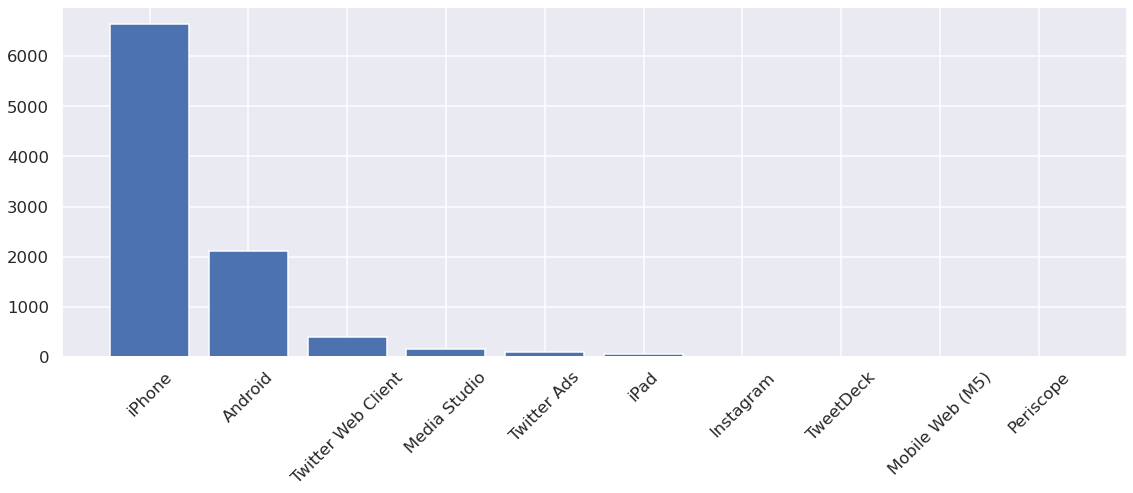

In [27]:
import matplotlib.pyplot as plt
trump_device_idx = df_trump['source'].value_counts().index
trump_device_val = df_trump['source'].value_counts().values
plt.figure(figsize = (17,6))
plt.bar(trump_device_idx,trump_device_val)
plt.xticks(rotation=45)

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

**Note** - If your `time` column is not in datetime format, the following code will not work.

In [28]:
df_trump['time'][0:3]

id
682723973449289728   2016-01-01 00:44:14+00:00
682764544402440192   2016-01-01 03:25:27+00:00
682792967736848385   2016-01-01 05:18:23+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [29]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

time   source  \
id                                                      
682723973449289728 2016-01-01 00:44:14+00:00  Android   
682764544402440192 2016-01-01 03:25:27+00:00   iPhone   
682792967736848385 2016-01-01 05:18:23+00:00   iPhone   
682805320217980929 2016-01-01 06:07:28+00:00   iPhone   
682805477168779264 2016-01-01 06:08:06+00:00  Android   

                                                                                                                                                        text  \
id                                                                                                                                                             
682723973449289728    I will be on @FoxNews live,  with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!   
682764544402440192                                                           HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv   
682792967736848385                                                                                             #HappyNewYearAmerica! https://t.co/EeQb8PDrUe   
682805320217980929                             Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7   
682805477168779264  "@jallenaip: Hillary said she was in a "Fog of War" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!"   

                    retweet_count  favorite_count                  est_time  
id                                                                           
682723973449289728           2108            6735 2015-12-31 19:44:14-05:00  
682764544402440192           3460            8581 2015-12-31 22:25:27-05:00  
682792967736848385           3434            9143 2016-01-01 00:18:23-05:00  
682805320217980929           1948            8258 2016-01-01 01:07:28-05:00  
682805477168779264           2721            7490 2016-01-01 01:08:06-05:00

**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [30]:
df_trump['hour'] = df_trump['est_time'].dt.hour + (df_trump['est_time'].dt.minute)/60 + (df_trump['est_time'].dt.second)/3600
# a new column that contains the rounded hour
df_trump['roundhour']=round(df_trump['hour'])

Use the `roundhour` column and plot the number of tweets at every hour of the day.
Order the plot using the hour of the day (1 to 24). Use seaborn `countplot`

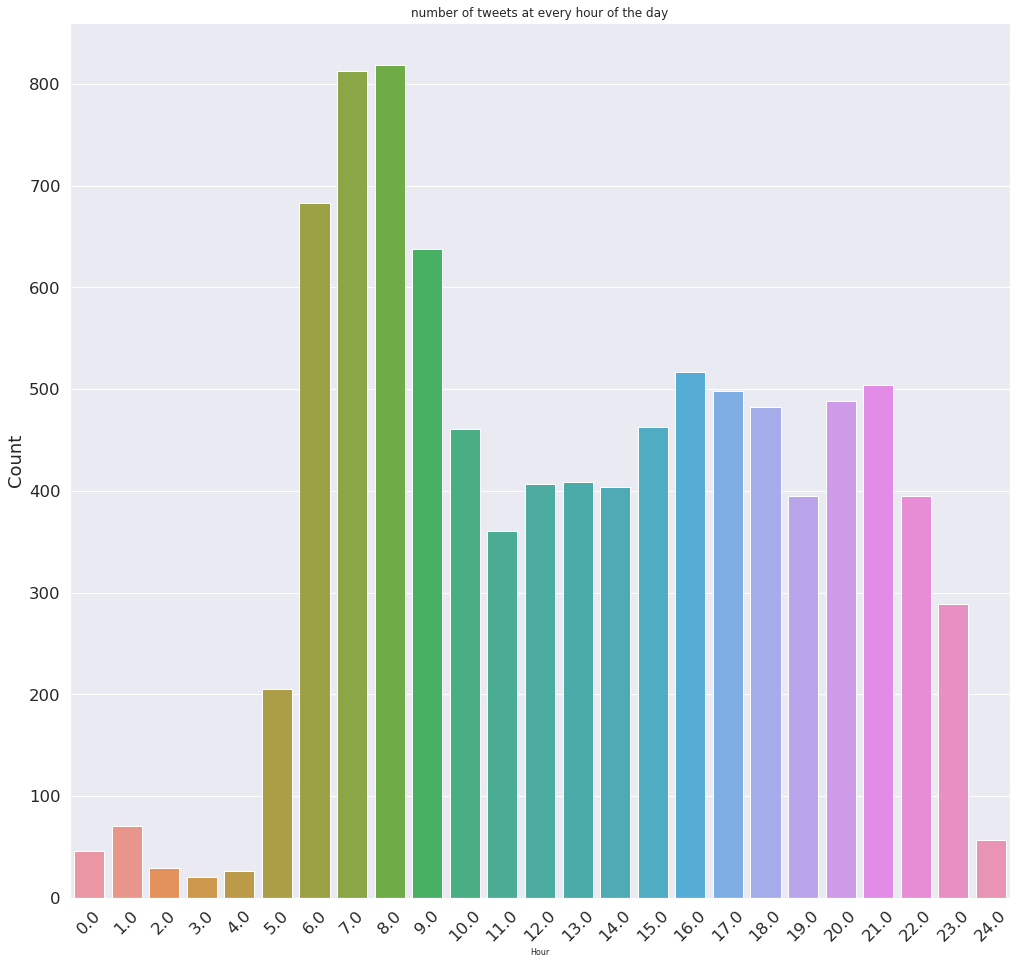

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.countplot(x="roundhour", data=df_trump)
sns.set(rc={"figure.figsize":(12, 7)})
plt.xlabel("Hour", fontsize=8)
plt.ylabel("Count")
plt.title("number of tweets at every hour of the day")
plt.xticks(rotation=45)
plt.show()

Now, use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following.
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 400px;"/>


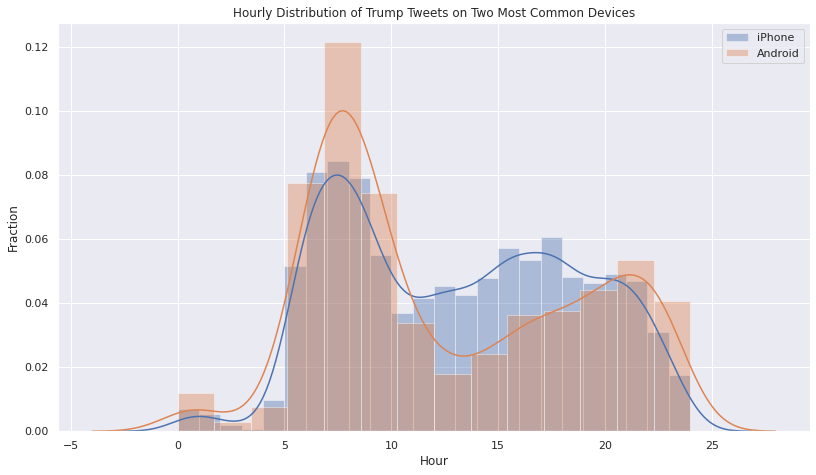

In [32]:
device_counts = df_trump["source"].value_counts()
most_common_devices = device_counts[:2].index.tolist()
filtered_df = df_trump[df_trump["source"].isin(most_common_devices)]
for device in most_common_devices:
    sns.distplot(filtered_df[filtered_df["source"] == device]["hour"], label=device)
plt.xlabel("Hour")
plt.ylabel("Fraction")
plt.title("Hourly Distribution of Trump Tweets on Two Most Common Devices")
plt.legend()
plt.show()

### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

**Your Response**: 


In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

\\
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 600px;"/>


In [33]:
df_trump['time'].dt.year.value_counts()

2016    4225
2018    2651
2017    2602
Name: time, dtype: int64

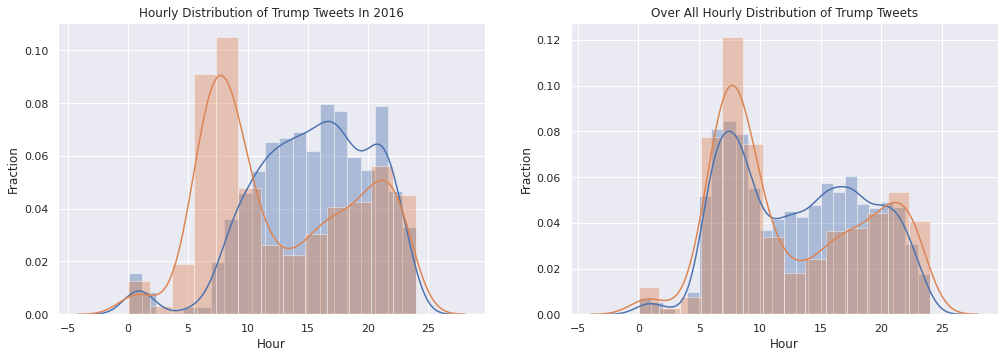

In [34]:
df_trump_2016 = df_trump[df_trump['time'].dt.year == 2016]
device_counts = df_trump_2016["source"].value_counts()
most_common_devices = device_counts[:2].index.tolist()
filtered_df = df_trump_2016[df_trump_2016["source"].isin(most_common_devices)]
rcParams['figure.figsize'] = 15,5
sns.set()
fig, axes = plt.subplots(1, 2)
for device in most_common_devices:
    gfg = sns.distplot(filtered_df[filtered_df["source"] == device]["hour"], label=device,ax=axes[0])
gfg.set(xlabel ="Hour", ylabel = "Fraction", title ='Hourly Distribution of Trump Tweets In 2016')

device_counts = df_trump["source"].value_counts()
most_common_devices = device_counts[:2].index.tolist()
filtered_df = df_trump[df_trump["source"].isin(most_common_devices)]
for device in most_common_devices:
    gfg = sns.distplot(filtered_df[filtered_df["source"] == device]["hour"], label=device,ax=axes[1])
gfg.set(xlabel ="Hour", ylabel = "Fraction", title ='Over All Hourly Distribution of Trump Tweets')
plt.show()

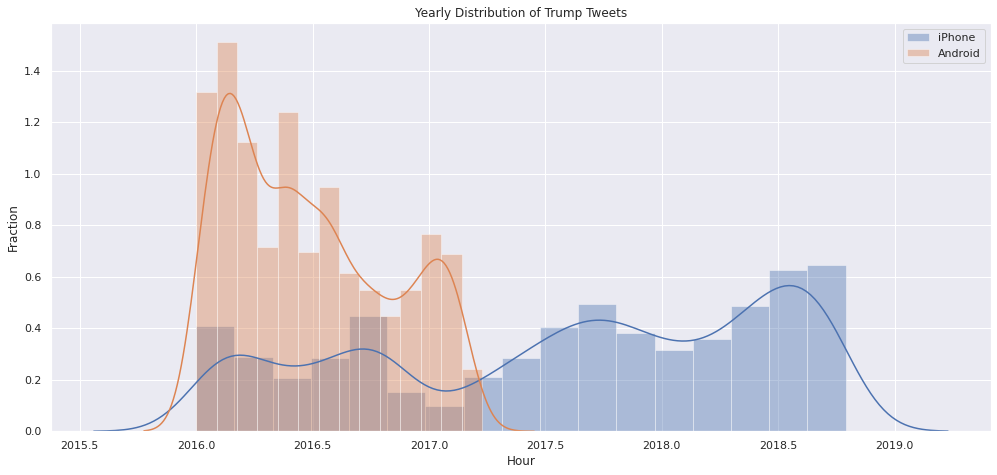

In [35]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

device_counts = df_trump["source"].value_counts()
most_common_devices = device_counts[:2].index.tolist()
filtered_df = df_trump[df_trump["source"].isin(most_common_devices)]
rcParams['figure.figsize'] = 15,7
for device in most_common_devices:
    gfg = sns.distplot(filtered_df[filtered_df["source"] == device]["year"], label=device)
gfg.set(xlabel ="Hour", ylabel = "Fraction", title ='Yearly Distribution of Trump Tweets')
plt.legend()
plt.show()

### Task 3.6
Edit this cell sto answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)
> As we can see from graph the most tweets from android are made by trump at late night
* What time of the day the Android tweets were made by paid staff?
> at morning time Android tweets were made by paid staff

Note that these are speculations based on what you observe in the data set.

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [36]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

![title](images/source_years.png)

In [37]:
device_counts = df_trump["source"].value_counts()
most_common_devices = device_counts[:2].index.tolist()
filtered_df = df_trump[df_trump["source"].isin(most_common_devices)]
rcParams['figure.figsize'] = 15,15
for device in most_common_devices:
    gfg = sns.distplot(filtered_df[filtered_df["source"] == device]["year"], label=device)
gfg.set(xlabel ="Hour", ylabel = "Fraction", title ='Yearly Distribution of Trump Tweets')
plt.legend()
plt.show()

## PART 4 - Sentiment Analysis  (group/individual)

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [38]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

**Question** How did they decide the polarities of these words? What are the other two columns in the lexicon? (See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [39]:
df_sent = pd.read_csv("data/vader_lexicon.txt",names = ['token','polarity','SD','raw_human_rating'],sep = '\t')
df_sent = df_sent.set_index('token')
df_sent = df_sent.drop(['SD','raw_human_rating'],axis = 1)

In [40]:
df_sent.head()

polarity
token          
$:         -1.5
%)         -0.4
%-)        -1.5
&-:        -0.4
&:         -0.7

### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

Be sure to lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [41]:
def calculate_word_sentiment_scores(text, lexicon_df):
    words = text.lower().split()
    scores = []
    for word in words:
        if word in lexicon_df.index:
            scores.append(lexicon_df.loc[word]['polarity'])
        else:
            scores.append(0)
    return pd.Series([scores,sum(scores)])

In [42]:
df_trump[['word_sentiment_scores','tweet_sentiment_score']] = df_trump['text'].apply(calculate_word_sentiment_scores, lexicon_df=df_sent)

In [43]:
df_trump.head()

time   source  \
id                                                      
682723973449289728 2016-01-01 00:44:14+00:00  Android   
682764544402440192 2016-01-01 03:25:27+00:00   iPhone   
682792967736848385 2016-01-01 05:18:23+00:00   iPhone   
682805320217980929 2016-01-01 06:07:28+00:00   iPhone   
682805477168779264 2016-01-01 06:08:06+00:00  Android   

                                                                                                                                                        text  \
id                                                                                                                                                             
682723973449289728    I will be on @FoxNews live,  with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!   
682764544402440192                                                           HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv   
682792967736848385                                                                                             #HappyNewYearAmerica! https://t.co/EeQb8PDrUe   
682805320217980929                             Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7   
682805477168779264  "@jallenaip: Hillary said she was in a "Fog of War" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!"   

                    retweet_count  favorite_count                  est_time  \
id                                                                            
682723973449289728           2108            6735 2015-12-31 19:44:14-05:00   
682764544402440192           3460            8581 2015-12-31 22:25:27-05:00   
682792967736848385           3434            9143 2016-01-01 00:18:23-05:00   
682805320217980929           1948            8258 2016-01-01 01:07:28-05:00   
682805477168779264           2721            7490 2016-01-01 01:08:06-05:00   

                         hour  roundhour    year  \
id                                                 
682723973449289728  19.737222       20.0  2016.0   
682764544402440192  22.424167       22.0  2016.0   
682792967736848385   0.306389        0.0  2016.0   
682805320217980929   1.124444        1.0  2016.0   
682805477168779264   1.135000        1.0  2016.0   

                                                                                word_sentiment_scores  \
id                                                                                                      
682723973449289728   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.1, 0]   
682764544402440192                                                       [2.7, 0, 0, 0, 1.5, 0, 0, 0]   
682792967736848385                                                                             [0, 0]   
682805320217980929                          [2.7, 0, 0, 0, 0, 1.5, 0, 0, 0, 3.1, 0, 0, 0, 0, 0, 0, 0]   
682805477168779264  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.8, 0, 0, -1.2, 0, 0, 0, 0, 0, 0, 0]   

                   tweet_sentiment_score  
id                                        
682723973449289728                   3.1  
682764544402440192                   4.2  
682792967736848385                     0  
682805320217980929                   7.3  
682805477168779264                  -3.0

### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

**Question** Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.


In [44]:

# Save your regex in punct_re
punct_re = r'[^\w\s\\n]'

df_trump['text'] = df_trump['text'].str.lower()
df_trump['no_punc'] = df_trump['text'].replace(punct_re,' ',regex = True)
df_trump.head()

time   source  \
id                                                      
682723973449289728 2016-01-01 00:44:14+00:00  Android   
682764544402440192 2016-01-01 03:25:27+00:00   iPhone   
682792967736848385 2016-01-01 05:18:23+00:00   iPhone   
682805320217980929 2016-01-01 06:07:28+00:00   iPhone   
682805477168779264 2016-01-01 06:08:06+00:00  Android   

                                                                                                                                                        text  \
id                                                                                                                                                             
682723973449289728    i will be on @foxnews live,  with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!   
682764544402440192                                                           happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv   
682792967736848385                                                                                             #happynewyearamerica! https://t.co/eeqb8pdrue   
682805320217980929                             happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7   
682805477168779264  "@jallenaip: hillary said she was in a "fog of war" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!"   

                    retweet_count  favorite_count                  est_time  \
id                                                                            
682723973449289728           2108            6735 2015-12-31 19:44:14-05:00   
682764544402440192           3460            8581 2015-12-31 22:25:27-05:00   
682792967736848385           3434            9143 2016-01-01 00:18:23-05:00   
682805320217980929           1948            8258 2016-01-01 01:07:28-05:00   
682805477168779264           2721            7490 2016-01-01 01:08:06-05:00   

                         hour  roundhour    year  \
id                                                 
682723973449289728  19.737222       20.0  2016.0   
682764544402440192  22.424167       22.0  2016.0   
682792967736848385   0.306389        0.0  2016.0   
682805320217980929   1.124444        1.0  2016.0   
682805477168779264   1.135000        1.0  2016.0   

                                                                                word_sentiment_scores  \
id                                                                                                      
682723973449289728   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.1, 0]   
682764544402440192                                                       [2.7, 0, 0, 0, 1.5, 0, 0, 0]   
682792967736848385                                                                             [0, 0]   
682805320217980929                          [2.7, 0, 0, 0, 0, 1.5, 0, 0, 0, 3.1, 0, 0, 0, 0, 0, 0, 0]   
682805477168779264  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.8, 0, 0, -1.2, 0, 0, 0, 0, 0, 0, 0]   

                   tweet_sentiment_score  \
id                                         
682723973449289728                   3.1   
682764544402440192                   4.2   
682792967736848385                     0   
682805320217980929                   7.3   
682805477168779264                  -3.0   

                                                                                                                                                     no_punc  
id                                                                                                                                                            
682723973449289728    i will be on  foxnews live   with members of my family  at 11 50 p m  we will ring in the new year together  make america great again   
682764544402440192                                                           h

In [45]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 4.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

You can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [46]:
tidy_format = df_trump['no_punc'].str.split().apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame('word')
tidy_format['num'] = tidy_format.groupby('id').cumcount()

tidy_format.head()

word  num
id                              
682723973449289728        i    0
682723973449289728     will    1
682723973449289728       be    2
682723973449289728       on    3
682723973449289728  foxnews    4

In [47]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `df_sent` tables and group the final answer.


In [48]:
tidy_format['id'] = tidy_format.index
df_sent['word'] = df_sent.index
merged_df = pd.merge(tidy_format, df_sent, on='word', how='inner')
merged_df.head()

word  num                  id  polarity
0  great   26  682723973449289728       3.1
1  great    9  682805320217980929       3.1
2  great   20  683062220490715136       3.1
3  great   21  683066650627846144       3.1
4  great   22  683127297457700864       3.1

In [49]:
df_trump['polarity'] = merged_df.groupby('id').sum()['polarity']
df_trump

time   source  \
id                                                       
682723973449289728  2016-01-01 00:44:14+00:00  Android   
682764544402440192  2016-01-01 03:25:27+00:00   iPhone   
682792967736848385  2016-01-01 05:18:23+00:00   iPhone   
682805320217980929  2016-01-01 06:07:28+00:00   iPhone   
682805477168779264  2016-01-01 06:08:06+00:00  Android   
...                                       ...      ...   
1052213711295930368 2018-10-16 15:04:32+00:00   iPhone   
1052217314463100928 2018-10-16 15:18:51+00:00   iPhone   
1052219253384994816 2018-10-16 15:26:33+00:00   iPhone   
1052232230972678145 2018-10-16 16:18:08+00:00   iPhone   
1052233253040640001 2018-10-16 16:22:11+00:00   iPhone   

                                                                                                                                                                                                                                                                                                        text  \
id                                                                                                                                                                                                                                                                                                             
682723973449289728                                                                                                                                                    i will be on @foxnews live,  with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!   
682764544402440192                                                                                                                                                                                                           happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv   
682792967736848385                                                                                                                                                                                                                                             #happynewyearamerica! https://t.co/eeqb8pdrue   
682805320217980929                                                                                                                                                                             happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7   
682805477168779264                                                                                                                                                  "@jallenaip: hillary said she was in a "fog of war" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!"   
...                                                                                                                                                                                                                                                                                                      ...   
1052213711295930368  “federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...   
1052217314463100928  “conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?   
1052219253384994816                 is it really possible that bruce ohr, whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier, and who was used as a pawn in this whole scam (witch hunt), is still working for the

In [50]:
import numpy as np
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
#assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)

### Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the 20 most positive and most 20 negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [51]:
print('Most negative tweets:')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
df_trump['compound_score'] = scaler.fit_transform(df_trump[['polarity']])
df_trump.sort_values('compound_score',ascending = True).head(20)

Most negative tweets:


time   source  \
id                                                       
1031590431379865600 2018-08-20 17:14:59+00:00   iPhone   
1029731513573822464 2018-08-15 14:08:18+00:00   iPhone   
984763579210633216  2018-04-13 12:01:47+00:00   iPhone   
1027585937163931648 2018-08-09 16:02:33+00:00   iPhone   
1031508193107763200 2018-08-20 11:48:12+00:00   iPhone   
1022808452677160960 2018-07-27 11:38:32+00:00   iPhone   
1031137499995930624 2018-08-19 11:15:12+00:00   iPhone   
934080974773776384  2017-11-24 15:27:13+00:00   iPhone   
1023653191974625280 2018-07-29 19:35:14+00:00   iPhone   
977585879651966980  2018-03-24 16:40:11+00:00   iPhone   
1035120511259500544 2018-08-30 11:02:16+00:00   iPhone   
854283110191685634  2017-04-18 10:38:59+00:00   iPhone   
803423203620245504  2016-11-29 02:19:53+00:00  Android   
984877999718895616  2018-04-13 19:36:27+00:00   iPhone   
1041330897948160002 2018-09-16 14:20:07+00:00   iPhone   
1008709364939677697 2018-06-18 13:53:48+00:00   iPhone   
925931294705545216  2017-11-02 03:43:18+00:00   iPhone   
1038103589904777218 2018-09-07 16:35:57+00:00   iPhone   
980065427375128576  2018-03-31 12:53:01+00:00   iPhone   
748906952713875456  2016-07-01 15:51:46+00:00   iPhone   

                                                                                                                                                                                                                                                                                                        text  \
id                                                                                                                                                                                                                                                                                                             
1031590431379865600   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!   
1029731513573822464           the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!   
984763579210633216   james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak a...   
1027585937163931648  this is an illegally brought rigged witch hunt run by people who are totally corrupt and/or conflicted. it was started and paid for by crooked hillary and the democrats. phony dossier, fisa disgrace and so many lying and dishonest people already fired. 17 angry dems? stay tuned!   
1031508193107763200                    where’s the collusion? they made up a phony crime called collusion, and when there was no collusion they say there was obstruction (of a phony crime that never existed). if you fight back or say anything bad about the rigged witch hunt, they scream obstruction!   
1022808452677160960  ....,the only collusion with russia was with the democrats, so now they are looking at my tweets (along with 53 million other people) - the rigged witch hunt continues! how stupid and unfair to our country....and so the fake news doesn’t waste my time with dumb questions, no,...   
1031137499995930624  ....and have demanded transparency so that this rigged and disgusting witch hunt can come to a close. so many lives have been ruined over nothing - mccarthyism at its worst! yet mueller &amp; his gang of dems refuse to look at the real crimes on the other side - media is even...   
934080974773776384          

In [52]:
print('Most positive tweets:')
df_trump.sort_values('compound_score',ascending = False).head(20)

Most positive tweets:


time        source  \
id                                                            
983143317889323008  2018-04-09 00:43:27+00:00        iPhone   
1007974129474121728 2018-06-16 13:12:14+00:00        iPhone   
973716838889660416  2018-03-14 00:25:59+00:00        iPhone   
1016638035281219584 2018-07-10 10:59:30+00:00        iPhone   
1014287566386888709 2018-07-03 23:19:35+00:00        iPhone   
994176238846664706  2018-05-09 11:24:20+00:00        iPhone   
819541997325316096  2017-01-12 13:50:13+00:00       Android   
1018541464416997376 2018-07-15 17:03:03+00:00        iPhone   
939560154269405184  2017-12-09 18:19:31+00:00        iPhone   
1029717928130818048 2018-08-15 13:14:19+00:00        iPhone   
1016663151935291393 2018-07-10 12:39:18+00:00        iPhone   
815449933453127681  2017-01-01 06:49:49+00:00        iPhone   
996723907867676673  2018-05-16 12:07:52+00:00        iPhone   
950866561153331202  2018-01-09 23:07:09+00:00        iPhone   
1029712857724792832 2018-08-15 12:54:11+00:00        iPhone   
956298399946563585  2018-01-24 22:51:20+00:00  Media Studio   
1022248383531163648 2018-07-25 22:33:01+00:00        iPhone   
935493619204620288  2017-11-28 13:00:34+00:00        iPhone   
1026495277824401408 2018-08-06 15:48:40+00:00        iPhone   
962784821389996033  2018-02-11 20:26:03+00:00        iPhone   

                                                                                                                                                                                                                                                                                                        text  \
id                                                                                                                                                                                                                                                                                                             
983143317889323008                                                                   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!   
1007974129474121728   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!   
973716838889660416                     it was my great honor to deliver a message at the marine corps air station miramar to our great u.s. military, straight from the heart of the american people: we support you, we thank you, we love you - and we will always have your back! https://t.co/oct1nh3don   
1016638035281219584  thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new poll says trump, at over 90%, is the most popular republican in history of the party. wow!   
1014287566386888709    thank you, @wvgovernor jim justice, for that warm introduction. tonight, it was my great honor to attend the “greenbrier classic – salute to service dinner” in west virginia! god bless our veterans. god bless america - and happy independence day to all! https://t.co/v35qvcn8m6   
994176238846664706      the republican party had a great night. tremendous voter energy and excitement, and all candidates are those who have a great chance of winning in november. the economy is sooo strong, and with nancy pelosi wanting to end the big tax cuts and raise taxes, why wouldn’t we win?   
819541997325316096                                                                                                                                              thank you to linda bean of l.l.bean for your great support and

### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

![title](images/nyt_vs_fox.png)

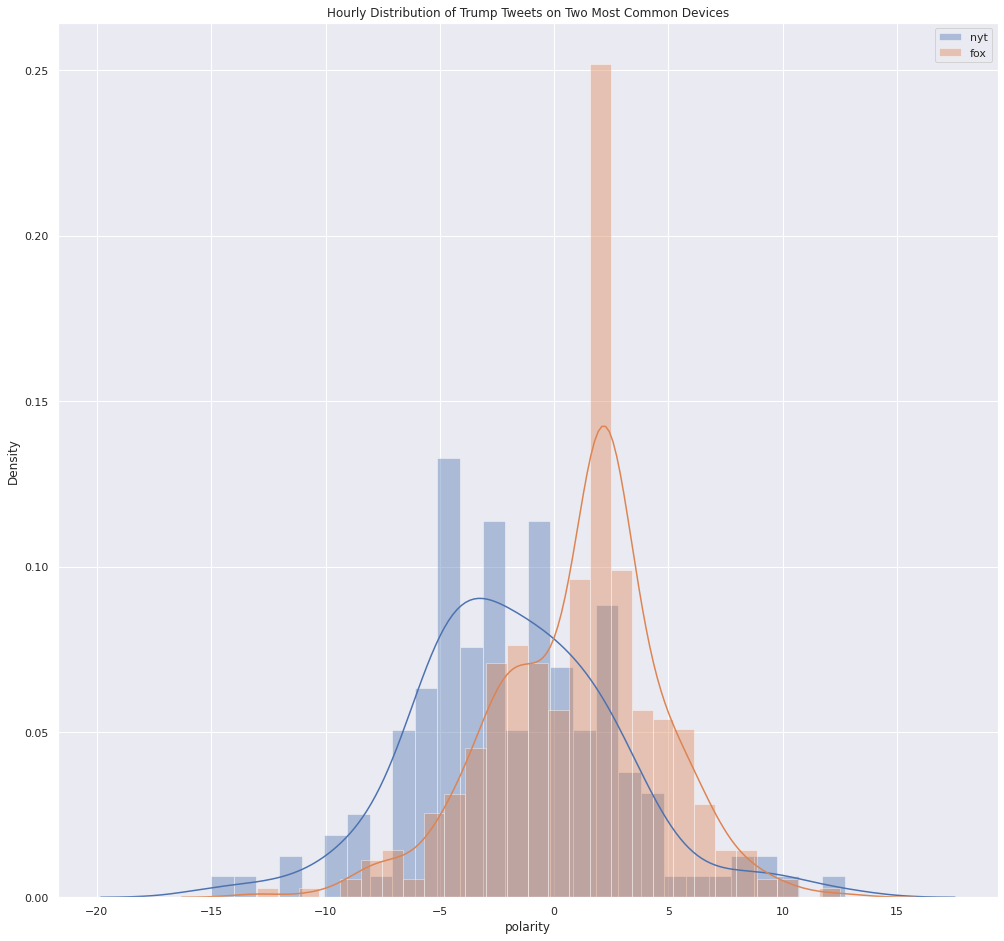

In [53]:
filtered_df = df_trump[df_trump['text'].str.contains('nyt|fox', case=False)]
for key in ['nyt','fox']:
    sns.distplot(filtered_df[filtered_df['text'].str.contains(key, case=False)]["polarity"],label = key,bins=28)
plt.title("Hourly Distribution of Trump Tweets on Two Most Common Devices")
plt.legend()
plt.show()

##### Comment on what you observe:

As we can see neutral sentiment for word fox because is centered at 0 while for tweet which containing nyt word has negative sentiment

## PART 5 - Principal Component Analysis (PCA) and Twitter  (group and individual)
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like **Make America Great Again**. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). See demo notes books and lecture slides for some sparse matrix methods.
Print the first 10 rows of the df to show the matrix you created

Start with the `tidy_format` dataframe

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50)
X = vectorizer.fit_transform(df_trump['no_punc'])
df_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_matrix = df_matrix.iloc[:5000, :]
print(df_matrix.head(10))


### putting words in tmp dataframe
tmp = pd.DataFrame(df_trump['no_punc'].apply(lambda x: x.split()))

# remove stopwords
ps = nltk.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
tmp['clean_text'] = tmp['no_punc'].apply(remove_stopwords)

# deal with plurals
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def functlemmit(x):
    lis = []
    for words in x:
        lis.append(wnl.lemmatize(words))
    return lis
tmp['clean_text'] =  tmp['clean_text'].apply(functlemmit)

# Remove numbers
tmp['clean_text'] = tmp['clean_text'].apply(lambda x: [token for token in x if not any(c.isdigit() for c in token)])


# Remove words with only 1 or 2 length

def remove_short_words(tokens):
    return [token for token in tokens if len(token) > 2]


tmp['clean_text'] = tmp['clean_text'].apply(remove_short_words)


   all  america  amp  and  are  as  at  be  big  by  ...  this  to  trump  \
0    0        1    0    0    0   0   1   1    0   0  ...     0   0      0   
1    0        0    1    0    0   0   0   0    0   0  ...     0   0      0   
2    0        0    0    0    0   0   0   0    0   0  ...     0   0      0   
3    1        0    0    0    0   0   0   0    0   0  ...     0   1      0   
4    0        0    0    0    0   1   0   0    0   0  ...     0   0      1   
5    0        0    0    0    0   0   0   0    0   0  ...     0   1      1   
6    0        0    0    1    0   0   0   1    0   0  ...     0   1      0   
7    0        0    0    0    0   0   0   0    0   0  ...     0   1      1   
8    0        0    2    0    1   0   0   0    0   0  ...     0   0      1   
9    0        1    0    1    0   0   0   0    0   0  ...     0   1      1   

   very  was  we  who  will  with  you  
0     0    0   1    0     2     1    0  
1     0    0   0    0     0     0    1  
2     0    0   0    0     0  

### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [55]:
tmp['clean_text'] =  tmp['clean_text'].agg(lambda x: ' '.join(map(str, x)))

In [56]:
tmp.head()

no_punc  \
id                                                                                                                                                                                 
682723973449289728  [i, will, be, on, foxnews, live, with, members, of, my, family, at, 11, 50, p, m, we, will, ring, in, the, new, year, together, make, america, great, again]   
682764544402440192                                                                       [happy, new, year, amp, thank, you, https, t, co, yo1yi8qbzy, https, t, co, uxuxwj1rbv]   
682792967736848385                                                                                                               [happynewyearamerica, https, t, co, eeqb8pdrue]   
682805320217980929                                 [happy, new, year, from, maralago, thank, you, to, my, great, family, for, all, of, their, support, https, t, co, 6usqsiaaj7]   
682805477168779264     [jallenaip, hillary, said, she, was, in, a, fog, of, war, as, explanation, for, the, lies, about, benghazi, no, fog, allowed, in, wh, vote, trump, potus]   

                                                                                              clean_text  
id                                                                                                        
682723973449289728                  foxnews live member family ring new year together make america great  
682764544402440192                                                    happy new year amp thank http http  
682792967736848385                                                              happynewyearamerica http  
682805320217980929                               happy new year maralago thank great family support http  
682805477168779264  jallenaip hillary said fog war explanation lie benghazi fog allowed vote trump potus

In [57]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tmp['clean_text'])

In [58]:
from sklearn.decomposition import PCA

# Create PCA object with 50 components
pca = PCA(n_components=50)

# Fit and transform the document-term-matrix
pca_matrix = pca.fit_transform(df_matrix)

# Extract the components and loading factors
components = pca.components_
loadings = pca_matrix.T


In [59]:
#principal_components = pca.components_
#labels = vectorizer.get_feature_names()

In [60]:
#components_df = pd.DataFrame(principal_components, columns=labels)

### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. Your answer will look closer to this.

![title](images/pca.png)



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9'),
  Text(0, 10.5, '10'),
  Text(0, 11.5, '11'),
  Text(0, 12.5, '12'),
  Text(0, 13.5, '13'),
  Text(0, 14.5, '14'),
  Text(0, 15.5, '15'),
  Text(0, 16.5, '16'),
  Text(0, 17.5, '17'),
  Text(0, 18.5, '18'),
  Text(0, 19.5, '19'),
  Text(0, 20.5, '20'),
  Text(0, 21.5, '21'),
  Text(0, 22.5, '22'),
  Text(0, 23.5, '23'),
  Text(0, 24.5, '24'),
  Text(0, 25.5, '25'),
  Text(0, 26.5, '26'),
  Text(0, 27.5, '27'),
  Text(0, 28.5, '28'),
  Text(0, 2

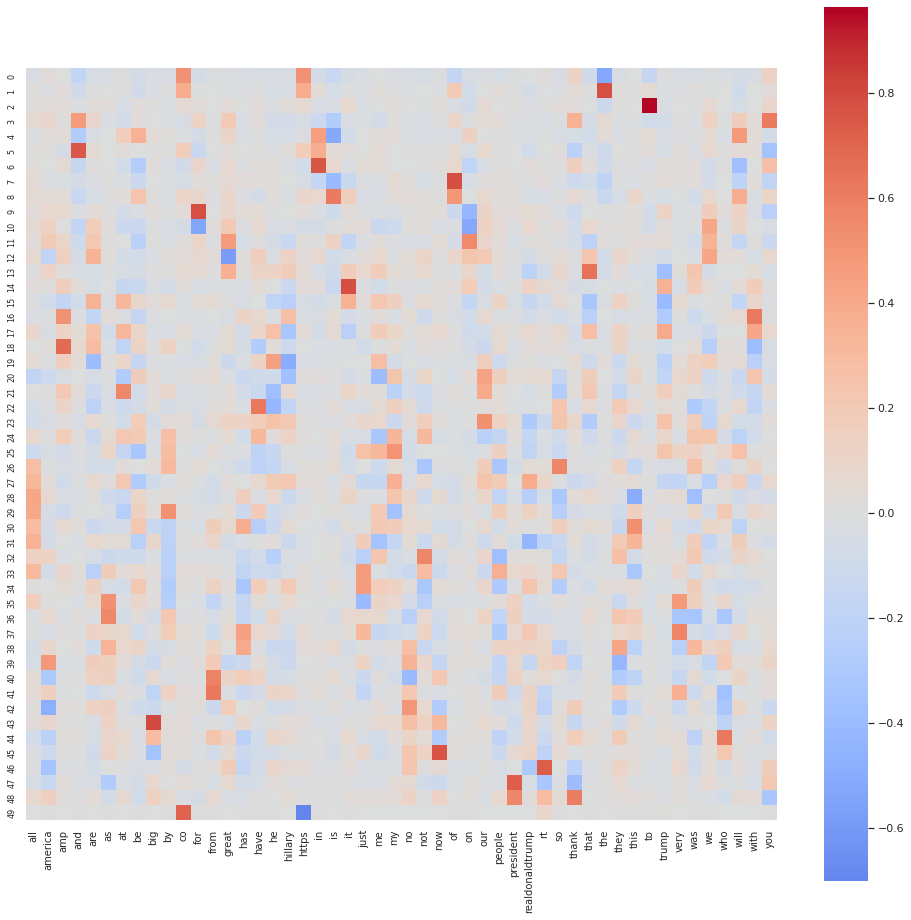

In [61]:
### BEGIN ANSWER
   
# your solution here
# Create a DataFrame to store the results
pca_df = pd.DataFrame(components, columns=df_matrix.columns)

# Generate the heatmap using seaborn
sns.heatmap(pca_df, cmap='coolwarm', center=0, square=True)
sns.set(font_scale=1.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
### END ANSWER

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

In [62]:
### BEGIN ANSWER
   
# your solution here
plt.figure(figsize=(10, 10))

# number of arrows to plot
num_arrows = 13

# obtain the first two components from PCA
pca_results = pca.transform(df_matrix)
pc1 = pca_results[:, 0]
pc2 = pca_results[:, 1]

# plot PC1 and PC2
plt.scatter(pc1, pc2)

# get indices of the top k words with the highest absolute loading factor
top_indices = np.abs(pca.components_[0]).argsort()[::-1][:num_arrows]

# add arrows for the most important words
for i in top_indices:
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='black', alpha=0.5, head_width=0.01, length_includes_head=True)
    plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15, vectorizer.get_feature_names()[i], color='black', ha='center', va='center')

# set plot labels and limits
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-0.25, 0.25])
plt.ylim([-0.25, 0.25])

# display the plot
plt.show()

### END ANSWER

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~5-7 pandas commands and get everything done on one line.

In [63]:
#top_20 = ...
### BEGIN ANSWER
   
# your solution here
top_20 = (
    df_trump[['text', 'retweet_count']]
    .assign(words=lambda x: x['text'].str.split())
    .explode('words')
    .groupby('words', as_index=False)['retweet_count']
    .mean()
    .query('retweet_count >= 25')
    .sort_values('retweet_count', ascending=False)
    .head(20)
    .set_index('words')
)

### END ANSWER

In [64]:
top_20.head()

retweet_count
words                                 
https://t.co/wyunhjjujg       369530.0
#fraudnewscnn                 369530.0
#fnn                          369530.0
insult                        254000.0
fat?"                         254000.0

### Task 6.2
Plot a bar chart of your results:

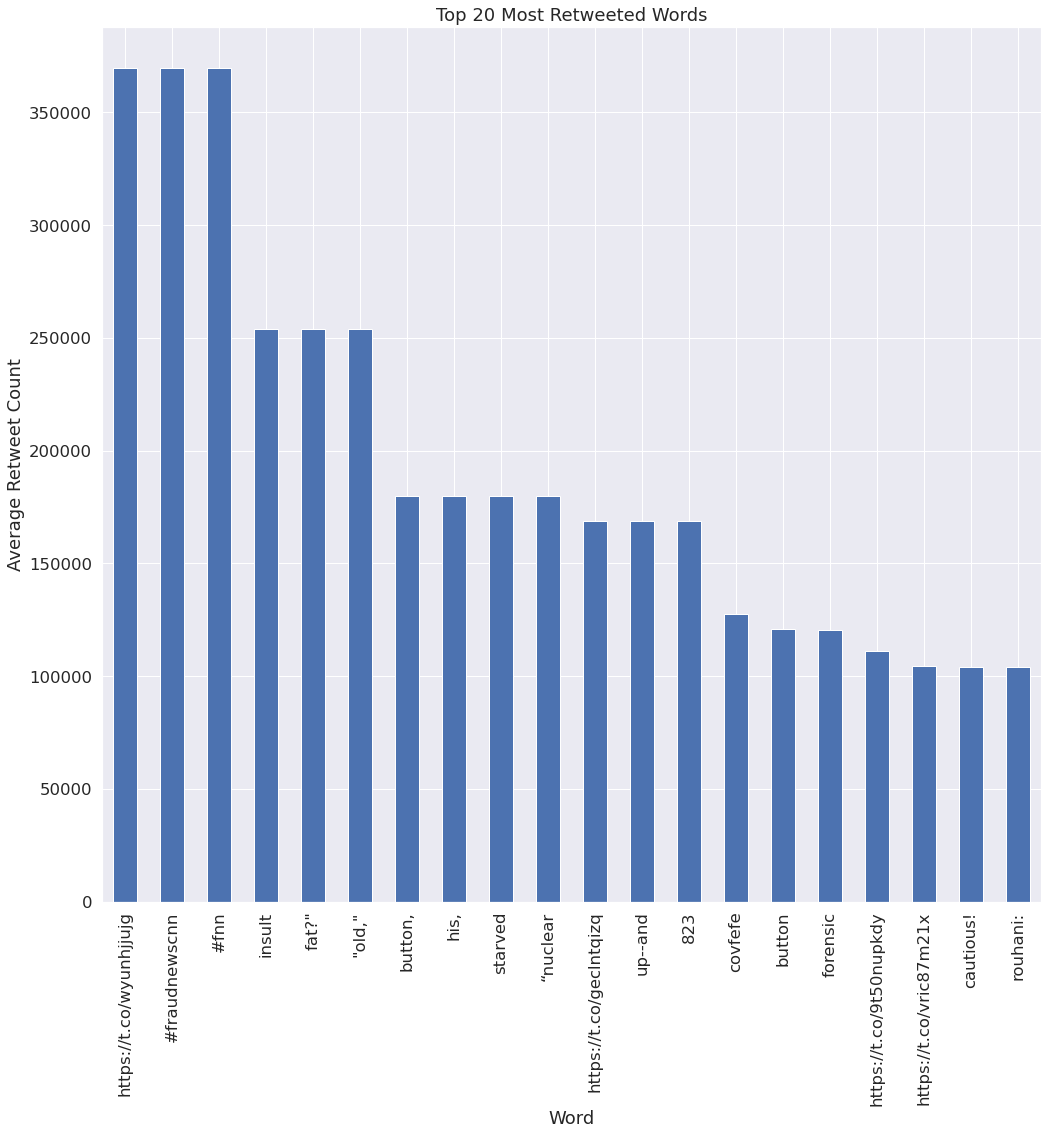

In [65]:
### BEGIN ANSWER
   
# your solution here
# plot bar chart of top 20 most retweeted words
top_20.plot(kind='bar', y='retweet_count', legend=None)
plt.xlabel('Word')
plt.ylabel('Average Retweet Count')
plt.title('Top 20 Most Retweeted Words')
plt.show()

### END ANSWER

## PART 7 - Kim Jong Un and Musk Tweet Analysis (Optional for Individual)
This is for the groups to do. What else can we study? Let us ask some open ended questions.

### Task 7.1
"kim", "jong" and "un" are apparently really popular in Trump's tweets! It seems like we can conclude that his tweets involving jong are more popular than his other tweets. Or can we?

Consider each of the statements about possible confounding factors below. State whether each statement is true or false and explain. If the statement is true, state whether the confounding factor could have made kim jong un related tweets higher in the list than they should be.

1. We didn't restrict our word list to nouns, so we have unhelpful words like "let" and "any" in our result.
      - That might be why 'un' is the most popular.
1. We didn't remove hashtags in our text, so we have duplicate words (eg. #great and great).
      - Some may only have '#great' not 'great' which make the average lower
1. We didn't account for the fact that Trump's follower count has increased over time.
      - This can affect a lot. As Trump's follower count has increased, the more popular every word be

Statement 1: True. The word list includes unhelpful words, which could have inflated the count for "un" in the top retweeted words list.

Statement 2: True. Including hashtags in our text can result in duplicate words, which could have inflated the count for certain words in the top retweeted words list.

Statement 3: True. Not accounting for changes in Trump's follower count over time could have confounded our analysis. As Trump's follower count increased, the overall number of retweets for each tweet increased as well, so words that are associated with more recent tweets may have a higher retweet count than words associated with older tweets.

### Task 7.2
Using the `df_trump` tweets construct an interesting plot describing a property of the data and discuss what you found below.

**Ideas:**

1. How has the sentiment changed with length of the tweets?
1. Does sentiment affect retweet count?
1. Are retweets more negative than regular tweets?
1. Are there any spikes in the number of retweets and do the correspond to world events? 
1. What terms have an especially positive or negative sentiment?

You can look at other data sources and even tweets. Do some plots and discuss. You can add more cells here as needed.


In [66]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


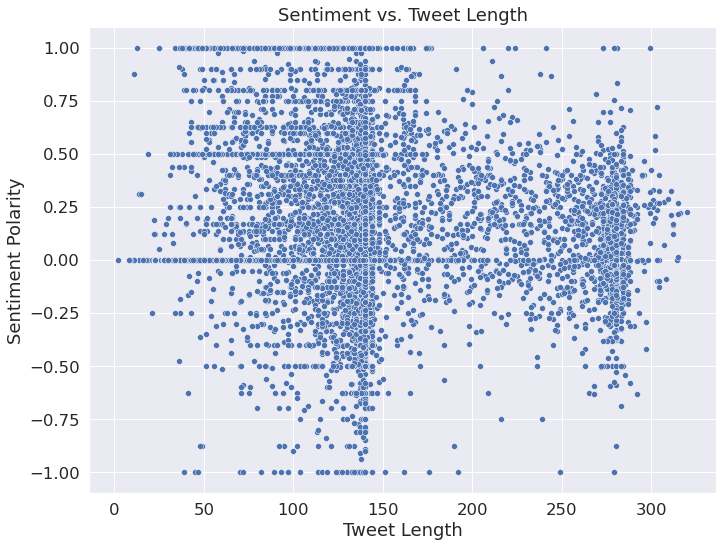

In [67]:

### BEGIN ANSWER
# your solution here

from textblob import TextBlob

# Calculate sentiment polarity for each tweet
df_trump['polarity'] = df_trump['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a scatter plot of tweet length vs. sentiment polarity
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_trump['text'].apply(len), y=df_trump['polarity'])
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment vs. Tweet Length')
plt.show()

### END ANSWER

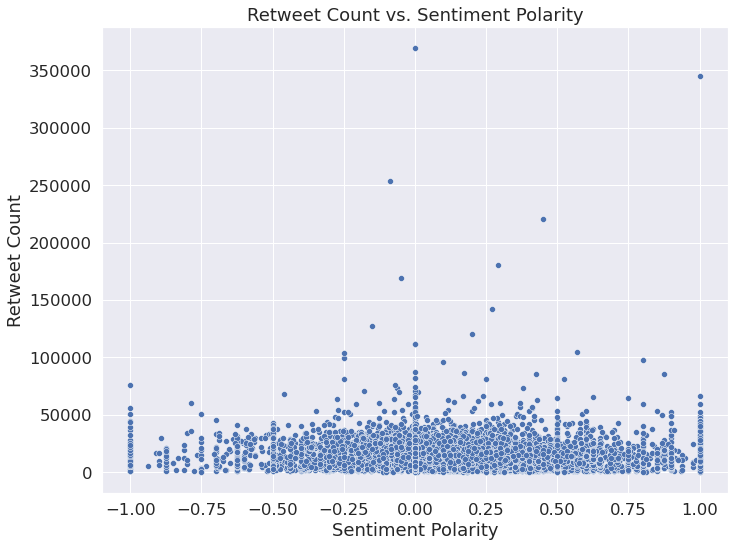

In [68]:
# Calculate sentiment polarity for each tweet
# Create a scatter plot of sentiment polarity vs. retweet count
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_trump['polarity'], y=df_trump['retweet_count'])
plt.xlabel('Sentiment Polarity')
plt.ylabel('Retweet Count')
plt.title('Retweet Count vs. Sentiment Polarity')
plt.show()

#### BEGIN ANSWER
Discussion: "We have tried to answer 2 questions The first is one whether sentiment changes with length of tweet and the second one is whether sentiment affects retweet count"

Answer: From the plots displayed above, we cannot observe any relationship between the variables. Hence it can be concluded that with the data we used, the length of tweet and the number of retweets both don't affect sentiment
#### END ANSWER

### Task 7.3 - Elon Musk and Twitter
Elon Musk purchased Twitter in October 2022. In November, 2022, he laid off over 50% of the employees. In this task, extract the Musk tweets from 2022 (where the conversation about twitter purchase began). Call the dataframe df_musk_2022

In [69]:
### BEGIN ANSWER
   
# your solution here
# create tweepy cursor object and initialize empty list to store tweets
cursor = tweepy.Cursor(api.user_timeline, screen_name='elonmusk', tweet_mode='extended')

# initialize list to store tweets
tweets = []

# define date range for tweets
date_since = datetime.date(2022, 1, 1)
date_until = datetime.date(2022, 12, 31)

# iterate through each tweet and append to list if in date range
for tweet in cursor.items():
    if tweet.created_at.date() >= date_since and tweet.created_at.date() <= date_until:
        tweets.append(tweet)

# create pandas dataframe from tweets list
df_musk_2022 = pd.DataFrame(data=[tweet.full_text for tweet in tweets], columns=['text'])

# add additional columns for tweet metadata
df_musk_2022['date'] = np.array([tweet.created_at for tweet in tweets])
df_musk_2022['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
df_musk_2022['favorites'] = np.array([tweet.favorite_count for tweet in tweets])
df_musk_2022['source'] = np.array([tweet.source for tweet in tweets])

df_musk_2022.head()

text  \
0                                                                                @WholeMarsBlog Agreed, update coming in Jan   
1  @jpr007 I’d like to thank the people of Norway again for their incredible support of electric vehicles. Norway rocks!! 🇳🇴   
2                                                           @ScottAdamsSays @Mediaite Yeah, this is silly. I love your work!   
3                   @TimRunsHisMouth @ZaleskiLuke Exactly! I am obviously “moderate wing”, except as viewed by the far left.   
4                                                                                           @pmarca Piketty is a misanthrope   

                       date  retweets  favorites              source  
0 2022-12-31 22:19:51+00:00       783      20062  Twitter for iPhone  
1 2022-12-31 22:15:41+00:00      1995      51336  Twitter for iPhone  
2 2022-12-31 22:10:36+00:00       948      21572  Twitter for iPhone  
3 2022-12-31 22:09:21+00:00      1536      24607  Twitter for iPhone  
4 2022-12-31 21:41:42+00:00       946      18187  Twitter for iPhone

### Task 7.4 - Elon Musk and PCA
Plot a heatmap similar to Task 5.3 for musk 2022 tweets

In [70]:
### BEGIN ANSWER
df_musk_2022['no_punc'] = df_musk_2022['text'].replace(punct_re,' ',regex = True)   
# your solution here

vectorizer = CountVectorizer(max_features=50)
X = vectorizer.fit_transform(df_musk_2022['no_punc'])
df_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_matrix = df_matrix.iloc[:5000, :]
print(df_matrix.head(10))

### putting words in tmp dataframe
tmp = pd.DataFrame(df_musk_2022['no_punc'].apply(lambda x: x.split()))


# remove stopwords

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
tmp['clean_text'] = tmp['no_punc'].apply(remove_stopwords)

# deal with plurals
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def functlemmit(x):
    lis = []
    for words in x:
        lis.append(wnl.lemmatize(words))
    return lis
tmp['clean_text'] =  tmp['clean_text'].apply(functlemmit)

# Remove numbers
tmp['clean_text'] = tmp['clean_text'].apply(lambda x: [token for token in x if not any(c.isdigit() for c in token)])


# Remove words with only 1 or 2 length

def remove_short_words(tokens):
    return [token for token in tokens if len(token) > 2]


tmp['clean_text'] = tmp['clean_text'].apply(remove_short_words)

tmp['clean_text'] =  tmp['clean_text'].agg(lambda x: ' '.join(map(str, x)))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tmp['clean_text'])

# Create PCA object with 50 components
pca = PCA(n_components=50)

# Fit and transform the document-term-matrix
pca_matrix = pca.fit_transform(df_matrix)

# Extract the components and loading factors
components = pca.components_
loadings = pca_matrix.T

pca_df = pd.DataFrame(components, columns=df_matrix.columns)

# Generate the heatmap using seaborn
sns.set(font_scale=0.4)
sns.heatmap(pca_df, cmap='coolwarm', center=0, square=True)
sns.set(font_scale=1.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
### END ANSWER

   all  amp  an  and  are  as  at  be  billym2k  but  ...  to  twitter  was  \
0    0    0   0    0    0   0   0   0         0    0  ...   0        0    0   
1    0    0   0    0    0   0   0   0         0    0  ...   1        0    0   
2    0    0   0    0    0   0   0   0         0    0  ...   0        0    0   
3    0    0   0    0    0   1   0   0         0    0  ...   0        0    0   
4    0    0   0    0    0   0   0   0         0    0  ...   0        0    0   
5    0    0   0    0    0   0   0   0         0    0  ...   0        0    0   
6    0    0   0    0    0   0   1   0         0    0  ...   1        0    0   
7    0    0   0    0    0   0   0   0         0    0  ...   0        0    0   
8    0    1   0    0    0   0   0   0         0    0  ...   0        1    0   
9    0    0   0    0    1   0   0   0         0    0  ...   0        0    0   

   we  what  wholemarsblog  will  with  you  your  
0   0     0              1     0     0    0     0  
1   0     0              0

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9'),
  Text(0, 10.5, '10'),
  Text(0, 11.5, '11'),
  Text(0, 12.5, '12'),
  Text(0, 13.5, '13'),
  Text(0, 14.5, '14'),
  Text(0, 15.5, '15'),
  Text(0, 16.5, '16'),
  Text(0, 17.5, '17'),
  Text(0, 18.5, '18'),
  Text(0, 19.5, '19'),
  Text(0, 20.5, '20'),
  Text(0, 21.5, '21'),
  Text(0, 22.5, '22'),
  Text(0, 23.5, '23'),
  Text(0, 24.5, '24'),
  Text(0, 25.5, '25'),
  Text(0, 26.5, '26'),
  Text(0, 27.5, '27'),
  Text(0, 28.5, '28'),
  Text(0, 2

### What are the most dominant themes in his 2022 tweets? 

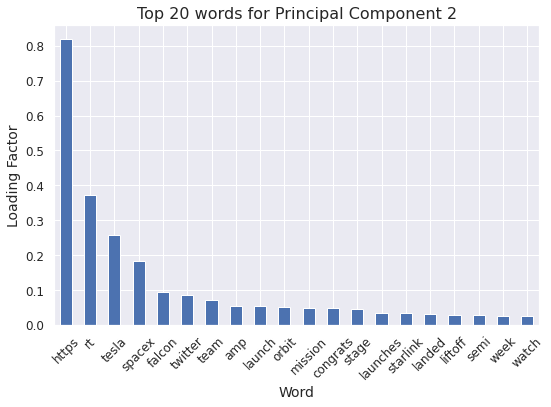

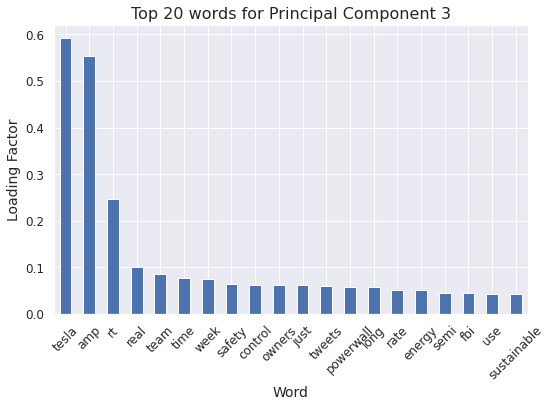

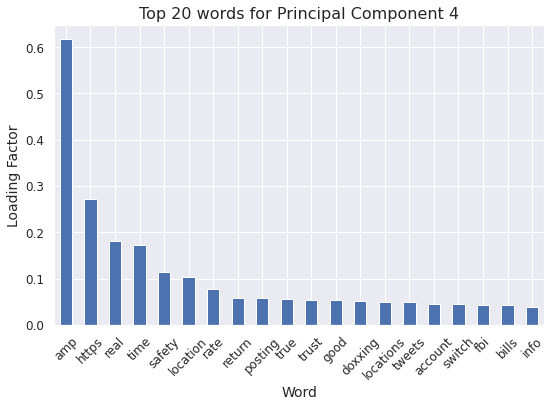

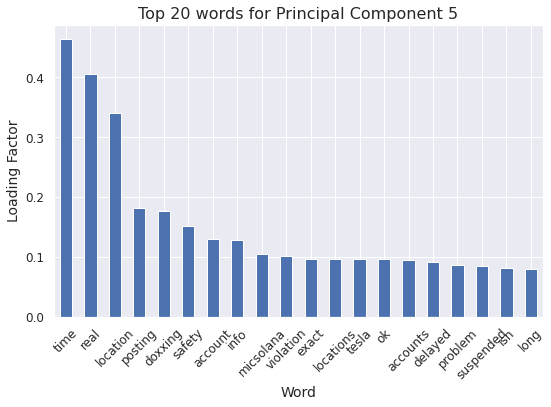

In [71]:
from sklearn.decomposition import PCA

# create document-term matrix using CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=1000)
dtm = cv.fit_transform(df_musk_2022['text'])

# fit PCA model to document-term matrix
pca = PCA(n_components=50)
pca.fit(dtm.toarray())

# create DataFrame to hold results
result_df = pd.DataFrame(pca.components_, columns=cv.get_feature_names())

# plot top 20 words for each principal component
for i in range(5):
    plt.figure(figsize=(8, 6))
    top_words = result_df.iloc[i].sort_values(ascending=False)[:20]
    top_words.plot(kind='bar')
    plt.title(f'Top 20 words for Principal Component {i+1}', fontsize=16)
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Loading Factor', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


It seems like the most dominant theme in Elon Musk's 2022 tweets is related to Twitter, which is evident from the top word for PC1 being "Twitter". Other dominant themes are related to Tesla, as "tesla" is the top word for PC3, and time, as "time" is the top word for PC4. Additionally, the presence of "https" in the top words for PC2 suggests a focus on web-related technologies and platforms. "amp" in the top words for PC5 could also indicate a continued emphasis on Tesla-related content. However, it's important to note that this analysis is based solely on the top words for each principal component, and further analysis is may be required to fully understand the dominant themes in Elon Musk's tweets.

### Task 7.5 - Elon Musk Twitter Analysis
Do a thorough analysis of how Elon Musk tweets emphasized why he want to buy twitter. This is an open ended question and be as detailed as possible.

In [72]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [73]:
pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [74]:
twitter_tweets = df_musk_2022[df_musk_2022['text'].str.contains('Twitter')]

twitter_tweets['sentiment'] = twitter_tweets['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

from gensim import corpora, models

# Tokenize the tweets
twitter_tweets['tokens'] = twitter_tweets['text'].apply(lambda x: x.split())

# Create a dictionary from the tokenized tweets
dictionary = corpora.Dictionary(twitter_tweets['tokens'])

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(tweet) for tweet in twitter_tweets['tokens']]

# Train the LDA model with 10 topics
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Print the top 5 words for each topic
for topic in lda_model.print_topics(num_words=5):
    print(topic)

(0, '0.023*"Twitter" + 0.021*"of" + 0.021*"to" + 0.016*"will" + 0.016*"that"')
(1, '0.050*"Twitter" + 0.030*"the" + 0.022*"to" + 0.017*"is" + 0.017*"of"')
(2, '0.016*"Twitter" + 0.014*"to" + 0.014*"on" + 0.013*"in" + 0.011*"that"')
(3, '0.031*"Twitter" + 0.021*"to" + 0.019*"will" + 0.012*"is" + 0.010*"and"')
(4, '0.023*"Twitter" + 0.021*"&amp;" + 0.019*"on" + 0.018*"of" + 0.013*"are"')
(5, '0.014*"the" + 0.014*"of" + 0.010*"they" + 0.010*"to" + 0.010*"this"')
(6, '0.034*"Twitter" + 0.019*"to" + 0.018*"is" + 0.011*"the" + 0.009*"on"')
(7, '0.038*"Twitter" + 0.024*"a" + 0.022*"is" + 0.020*"the" + 0.019*"in"')
(8, '0.028*"is" + 0.023*"Twitter" + 0.016*"to" + 0.012*"more" + 0.009*"the"')
(9, '0.023*"Twitter" + 0.015*"the" + 0.008*"this" + 0.008*"you" + 0.008*"were"')


#### BEGIN ANSWER
This output gives the top 10 topics generated by running LDA on the Twitter data. The numbers in parentheses are the topic numbers, and the strings after the topic numbers show the top 5 words for each topic along with their corresponding probabilities.

To analyze Elon Musk's emphasis on why he wants to buy Twitter, we could try to match the words in each topic to words that are relevant to the topic of buying Twitter. For example, the first topic has high probabilities for "Twitter", "the", "to", and "in", which could be relevant to discussions of Twitter's value or potential for growth. The second topic has high probabilities for "Twitter", "on", "to", and "@Twitter", which could be relevant to discussions of Twitter's platform and features.

We could also use the output from the PCA analysis to see if there are any specific words that have high loadings on the components that explain the most variance in the data. For example, if the word "buy" has a high loading on one of the principal components, that could suggest that discussions of buying or acquiring Twitter were a major topic of conversation.   

#### END ANSWER

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please rename the file as yourNetID_midsemester.jpynb<br>
<b> Group Projects:</b> Each person in the group must submit a copy with both names listed and your partners contribution answered. If you are doing a group project, you must inform complete the form prior to 3/10 that you intend to work as a group and submit your name and your partner name via the form. 
 https://forms.gle/RdTYYx7GRMQFVsvd7   
We will <b>not accept group work</b> if your TA has not been notified.<br>
<b> Submit To: </b> Codebench (Do not submit data files)<br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Created by Andy Guna @2019-2023 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez

@ Copyrighted Material. DO NOT post online.